In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from warnings import simplefilter

In [2]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Loading the dataset
house = pd.read_csv("C:/Users/fetih.kaya/Desktop/house_dataset.csv")

## EXPLORATORY DATA ANALYSIS & DATA PREPROCESSING

In [4]:
#Shape of dataset
house.shape

(21600, 21)

In [5]:
#Column labels
house.columns

Index(['id', 'date', 'no_bedrooms', 'no_baths', 'living_sqft', 'lot_sqft',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'above_sqft',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code', 'lat', 'long',
       'living15_sqft', 'lot15_sqft', 'house_price'],
      dtype='object')

In [6]:
#Some exapmle rows 
house.head(10)

,id,date,no_bedrooms,no_baths,living_sqft,lot_sqft,floors,waterfront,view,condition,grade,above_sqft,sqft_basement,yr_built,yr_renovated,zip_code,lat,long,living15_sqft,lot15_sqft,house_price
0,6054650070,20141007T000000,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,400000.0
1,1175000570,20150312T000000,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,530000.0
2,9297300055,20150124T000000,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000,650000.0
3,1875500060,20140731T000000,3,2.00,1890,14040,2.0,0,0,3,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018,395000.0
4,6865200140,20140529T000000,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300,485000.0
5,16000397,20141205T000000,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,189000.0
6,7983200060,20150424T000000,3,1.00,1250,9774,1.0,0,0,4,7,1250,0,1969,0,98003,47.3343,-122.306,1280,8850,230000.0
7,6300500875,20140514T000000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980,385000.0
8,2524049179,20140826T000000,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000.0
9,7137970340,20140703T000000,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005,285000.0


In [7]:
#Data types of attributes
house.dtypes

#All the data types are coherent with displayed example rows. 
#Bathroom numbers are given in float, it is a bit strange, but many of them consist decimal numbers so it cannot be noisy data


id                 int64
date              object
no_bedrooms        int64
no_baths         float64
living_sqft        int64
lot_sqft           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
above_sqft         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zip_code           int64
lat              float64
long             float64
living15_sqft      int64
lot15_sqft         int64
house_price      float64
dtype: object

In [8]:
#Drop unimportant columns
house = house.drop(['id','date'], axis=1)

#"id" and "date" columns do not carry valuable information for price prediction, so drop them

In [9]:
#Missing data
number_of_missing_data = (house.isnull().sum()).sort_values(ascending=False)
number_of_missing_data = pd.DataFrame(number_of_missing_data, columns=['# of missing values'])                                                                    
percentage_of_missing_data = (house.isnull().sum()/house.shape[0]*100).sort_values(ascending=False)
percentage_of_missing_data = pd.DataFrame(percentage_of_missing_data, columns=['% of missing part'])
missing = pd.concat([number_of_missing_data,percentage_of_missing_data], axis=1) 

missing

#There is no missing value in the dataset

,# of missing values,% of missing part
house_price,0,0.0
grade,0,0.0
no_baths,0,0.0
living_sqft,0,0.0
lot_sqft,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0
condition,0,0.0
above_sqft,0,0.0


In [10]:
#Duplicated rows
house.duplicated().value_counts()

False    21595
True         5
dtype: int64

In [11]:
#Remove duplicates
house = house.drop_duplicates()

In [12]:
house = house.reset_index(drop=True)

In [13]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 19 columns):
no_bedrooms      21595 non-null int64
no_baths         21595 non-null float64
living_sqft      21595 non-null int64
lot_sqft         21595 non-null int64
floors           21595 non-null float64
waterfront       21595 non-null int64
view             21595 non-null int64
condition        21595 non-null int64
grade            21595 non-null int64
above_sqft       21595 non-null int64
sqft_basement    21595 non-null int64
yr_built         21595 non-null int64
yr_renovated     21595 non-null int64
zip_code         21595 non-null int64
lat              21595 non-null float64
long             21595 non-null float64
living15_sqft    21595 non-null int64
lot15_sqft       21595 non-null int64
house_price      21595 non-null float64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


### Remove noisy data and outliers from dataset

In [14]:
house['no_bedrooms'].value_counts()

3     9812
4     6879
2     2757
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: no_bedrooms, dtype: int64

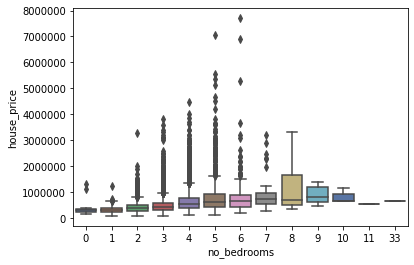

In [15]:
sns.boxplot(x='no_bedrooms', y='house_price', data=house, palette='deep')

In [16]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 1000000) and (house.no_bedrooms[i] == 0)) or ((house.house_price[i] > 1000000) and (house.no_bedrooms[i] == 1)) or ((house.house_price[i] > 2500000) and (house.no_bedrooms[i] == 2)) or ((house.house_price[i] > 2800000) and (house.no_bedrooms[i] == 3)) or ((house.house_price[i] > 250000) and (house.no_bedrooms[i] == 6)) or ((house.house_price[i] > 150000) and (house.no_bedrooms[i] == 7)) or ((house.house_price[i] > 0) and (house.no_bedrooms[i] == 33)) :
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [17]:
house['no_baths'].value_counts()

2.50    5346
1.00    3841
1.75    3030
2.25    2026
2.00    1904
1.50    1440
2.75    1151
3.50     707
3.00     705
3.25     573
3.75     140
4.00     120
4.50      72
0.75      72
4.25      68
4.75      18
5.00      15
5.25      10
5.50       9
1.25       8
0.00       8
6.00       5
0.50       4
5.75       3
6.25       2
7.50       1
6.75       1
6.50       1
Name: no_baths, dtype: int64

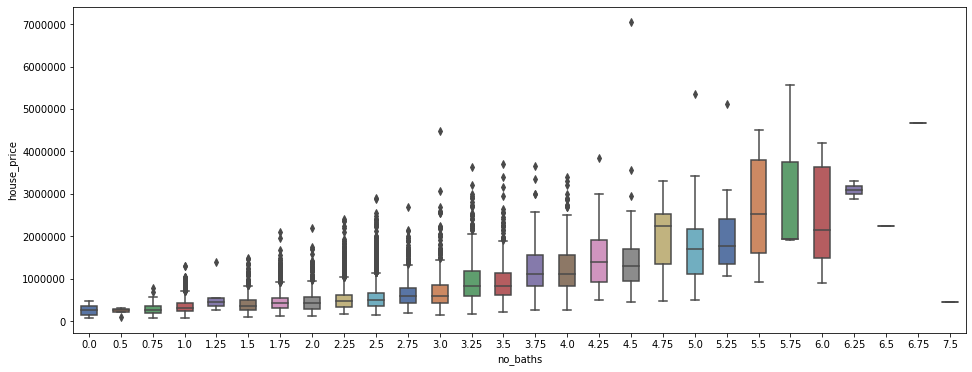

In [18]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='no_baths', y='house_price', data=house, palette='deep', width=0.5)

In [19]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 600000) and (house.no_baths[i] == 0.75)) or ((house.house_price[i] > 1100000) and (house.no_baths[i] == 1.0)) or ((house.house_price[i] > 1000000) and (house.no_baths[i] == 1.25)) or ((house.house_price[i] > 1750000) and (house.no_baths[i] == 1.75)) or ((house.house_price[i] > 200000) and (house.no_baths[i] == 2.0)) or ((house.house_price[i] > 275000) and (house.no_baths[i] == 2.5)) or ((house.house_price[i] > 2500000) and (house.no_baths[i] == 2.75)) or ((house.house_price[i] > 3000000) and (house.no_baths[i] == 3.0)) or ((house.house_price[i] > 3020000) and (house.no_baths[i] == 3.25)) or ((house.house_price[i] > 2700000) and (house.no_baths[i] == 3.5)) or ((house.house_price[i] > 2750000) and (house.no_baths[i] == 3.75)) or ((house.house_price[i] > 3000000) and (house.no_baths[i] == 4.0)) or ((house.house_price[i] > 3000000) and (house.no_baths[i] == 4.25)) or ((house.house_price[i] > 2500000) and (house.no_baths[i] == 4.5)) or ((house.house_price[i] > 2500000) and (house.no_baths[i] == 5.0)) :
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [20]:
house['living_sqft'].value_counts()

1010    122
1250    111
1300    108
1400    107
1200    105
       ... 
1522      1
5640      1
3595      1
1413      1
2031      1
Name: living_sqft, Length: 779, dtype: int64

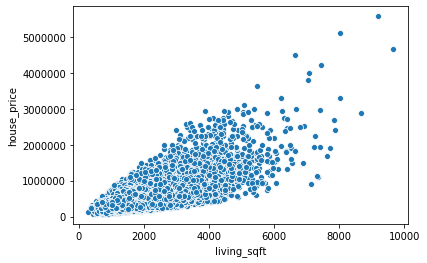

In [21]:
sns.scatterplot(x='living_sqft', y='house_price', data=house, palette='deep')

In [22]:
house['lot_sqft'].value_counts()

5000     255
6000     215
4000     195
7200     166
7500      93
        ... 
5782       1
34460      1
36509      1
15996      1
8196       1
Name: lot_sqft, Length: 6924, dtype: int64

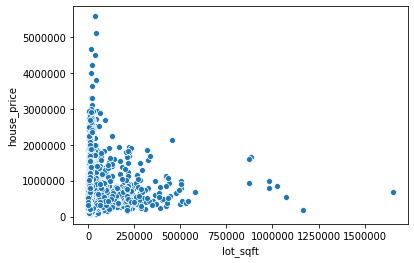

In [23]:
sns.scatterplot(x='lot_sqft', y='house_price', data=house, palette='deep')

In [24]:
#Remove the outlier(s)
for i in range (house.shape[0]):
    if house.lot_sqft[i] > 1500000:
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [25]:
house['floors'].value_counts()

1.0    8403
2.0    4063
1.5    1448
3.0     352
2.5      96
3.5       3
Name: floors, dtype: int64

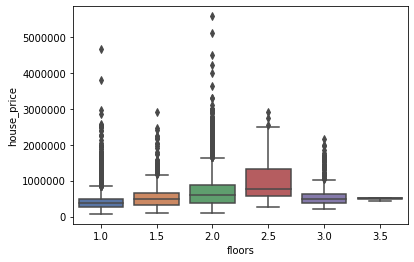

In [26]:
sns.boxplot(x='floors', y='house_price', data=house, palette='deep')

In [27]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 3500000) and (house.floors[i] == 1.0)) or ((house.house_price[i] > 2600000) and (house.floors[i] == 1.5)) or ((house.house_price[i] > 4500000) and (house.floors[i] == 2.0)):
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [28]:
house['waterfront'].value_counts()

0    14257
1      103
Name: waterfront, dtype: int64

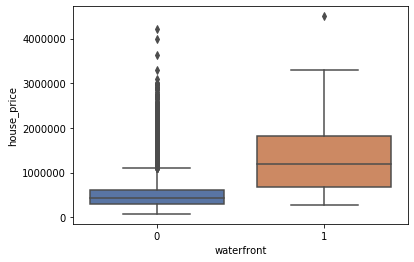

In [29]:
sns.boxplot(x='waterfront', y='house_price', data=house, palette='deep')

In [30]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 3500000) and (house.waterfront[i] == 0)) or ((house.house_price[i] > 4000000) and (house.waterfront[i] == 1)):
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [31]:
house['view'].value_counts()

0    12895
2      673
3      350
1      239
4      199
Name: view, dtype: int64

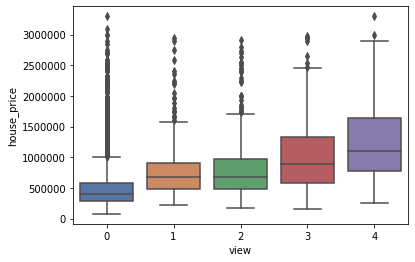

In [32]:
sns.boxplot(x='view', y='house_price', data=house, palette='deep')

In [33]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 3000000) and (house.view[i] == 4)):
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [34]:
house['condition'].value_counts()

3    8699
4    4296
5    1187
2     145
1      28
Name: condition, dtype: int64

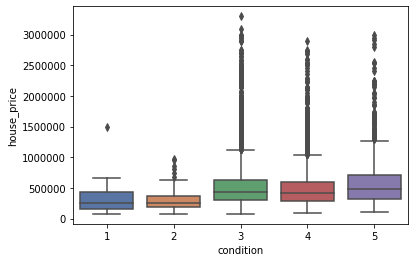

In [35]:
sns.boxplot(x='condition', y='house_price', data=house, palette='deep')

In [36]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 1000000) and (house.condition[i] == 1)):
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [37]:
house['grade'].value_counts()

7     6607
8     3316
6     1839
9     1261
10     703
11     295
5      231
12      63
4       29
13       6
3        3
1        1
Name: grade, dtype: int64

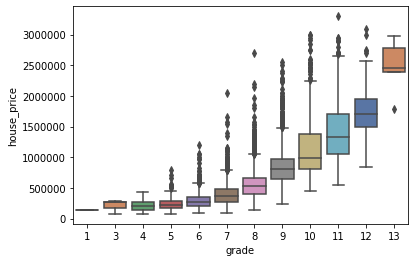

In [38]:
sns.boxplot(x='grade', y='house_price', data=house, palette='deep')

In [39]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 2600000) and (house.grade[i] == 12)):
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [40]:
house['above_sqft'].value_counts()

1010    181
1200    172
1300    167
1220    154
1140    151
       ... 
2555      1
410       1
4480      1
370       1
2031      1
Name: above_sqft, Length: 700, dtype: int64

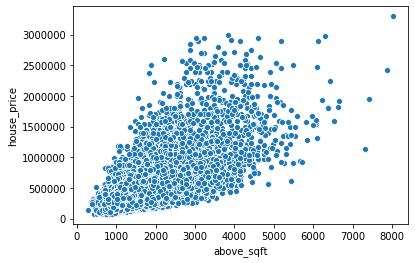

In [41]:
sns.scatterplot(x='above_sqft', y='house_price', data=house, palette='deep')

In [42]:
house['sqft_basement'].value_counts()

0       8186
500      175
700      164
600      159
400      142
        ... 
1930       1
2250       1
235        1
243        1
435        1
Name: sqft_basement, Length: 263, dtype: int64

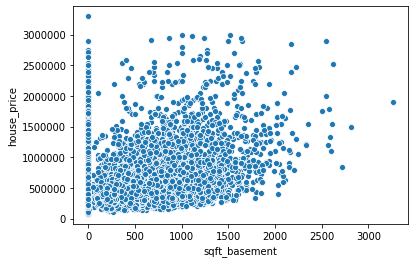

In [43]:
sns.scatterplot(x='sqft_basement', y='house_price', data=house, palette='deep')

In [44]:
#Remove the outlier(s)
for i in range (house.shape[0]):
    if house.sqft_basement[i] > 3000:
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [45]:
house['yr_built'].value_counts()

2014    331
1977    313
1968    303
1978    286
1959    274
       ... 
1933     25
1901     24
1935     20
1902     18
1934     18
Name: yr_built, Length: 116, dtype: int64

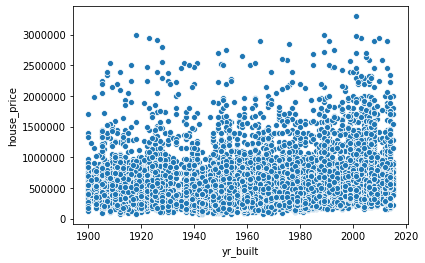

In [46]:
sns.scatterplot(x='yr_built', y='house_price', data=house, palette='deep')

In [47]:
house['yr_renovated'].value_counts()

0       13731
2014       67
2000       25
2007       24
2005       24
        ...  
1950        1
1934        1
1955        1
1971        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

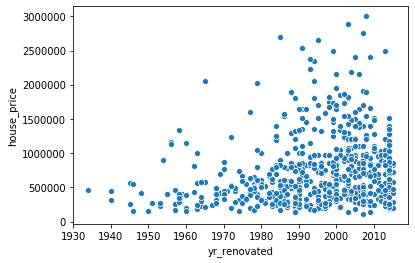

In [48]:
house_yr_renovated = house
for i in range (house_yr_renovated.shape[0]):
    if house_yr_renovated.yr_renovated[i] == 0:
        house_yr_renovated = house_yr_renovated.drop(i, axis=0)
house_yr_renovated = house_yr_renovated.reset_index(drop=True)
sns.scatterplot(x='yr_renovated', y='house_price', data=house_yr_renovated, palette='deep')

In [49]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 1500000) and (house.yr_renovated[i] < 1985)) or ((house.house_price[i] > 2500000) and (house.yr_renovated[i] < 1990)):
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [50]:
house['zip_code'].value_counts()

98115    445
98103    434
98117    403
98118    391
98133    381
        ... 
98102     67
98109     67
98024     57
98148     44
98039     18
Name: zip_code, Length: 70, dtype: int64

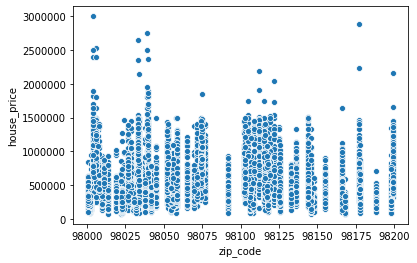

In [51]:
sns.scatterplot(x='zip_code', y='house_price', data=house, palette='deep')

In [52]:
#Remove the outlier(s) 
for i in range (house.shape[0]):
    if ((house.house_price[i] > 1500000) and (house.zip_code[i] > 98150)) or ((house.house_price[i] > 2750000) and (house.yr_renovated[i] < 98025)):
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [53]:
house['lat'].value_counts()

47.6846    14
47.6624    14
47.6711    14
47.5402    13
47.6729    12
           ..
47.5928     1
47.6244     1
47.3642     1
47.2175     1
47.2051     1
Name: lat, Length: 4595, dtype: int64

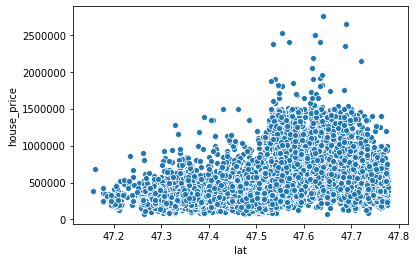

In [54]:
sns.scatterplot(x='lat', y='house_price', data=house, palette='deep')

In [55]:
house['long'].value_counts()

-122.300    86
-122.291    79
-122.290    78
-122.362    76
-122.306    75
            ..
-121.852     1
-121.929     1
-121.316     1
-121.882     1
-121.945     1
Name: long, Length: 707, dtype: int64

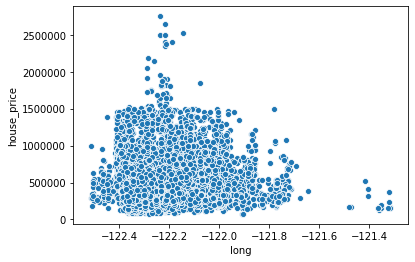

In [56]:
sns.scatterplot(x='long', y='house_price', data=house, palette='deep')

In [57]:
house['living15_sqft'].value_counts()

1440    146
1540    146
1460    138
1560    136
1500    133
       ... 
828       1
4950      1
5030      1
3045      1
2049      1
Name: living15_sqft, Length: 609, dtype: int64

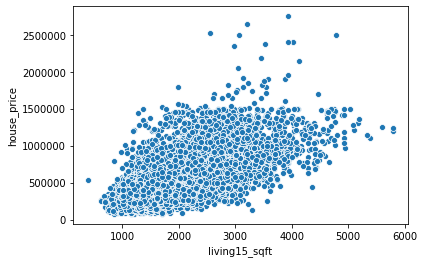

In [58]:
sns.scatterplot(x='living15_sqft', y='house_price', data=house, palette='deep')

In [59]:
house['lot15_sqft'].value_counts()

5000     281
4000     270
6000     221
7200     154
4800     110
        ... 
5814       1
7863       1
63162      1
3773       1
10353      1
Name: lot15_sqft, Length: 6091, dtype: int64

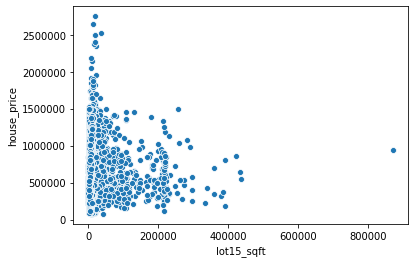

In [60]:
sns.scatterplot(x='lot15_sqft', y='house_price', data=house, palette='deep')

In [61]:
#Remove the outlier(s)
for i in range (house.shape[0]):
    if house.lot15_sqft[i] > 800000:
        house = house.drop(i, axis=0)
house = house.reset_index(drop=True)

In [62]:
house.nunique()

no_bedrooms        11
no_baths           24
living_sqft       704
lot_sqft         6737
floors              6
waterfront          2
view                5
condition           5
grade              11
above_sqft        653
sqft_basement     254
yr_built          116
yr_renovated       69
zip_code           70
lat              4595
long              706
living15_sqft     609
lot15_sqft       6090
house_price      2727
dtype: int64

In [63]:
house.shape

(14017, 19)

### Attributes correlation with house price 

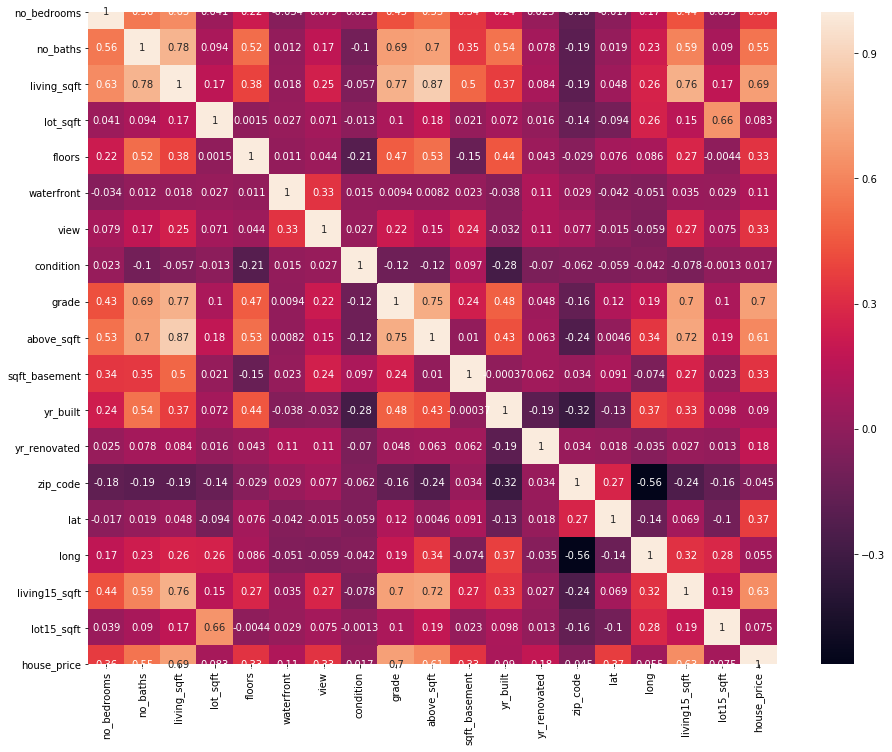

In [64]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(house.corr(), annot=True, square=True)

In [65]:
attributes = []
cor_values = []
p_values = []

for i in range(len(house.columns)):
    attributes.append(house.columns[i])
    cor_val, p_val = stats.pearsonr(house.iloc[:,i], house.loc[:,'house_price'])
    cor_values.append(cor_val)
    p_values.append(p_val)

df1 = pd.DataFrame(attributes, columns = ["Attributes"])
df2 = pd.DataFrame(cor_values, columns = ["Pearson Corr."])
df3 = pd.DataFrame(p_values, columns = ["P-Values"])

df2 = df2.abs()

df  = pd.concat([df1,df2,df3], axis=1)
df  = df.sort_values(["Pearson Corr."], ascending = False)
df  = df.reset_index(drop=True)

df

,Attributes,Pearson Corr.,P-Values
0,house_price,1.000000,0.000000e+00
1,grade,0.696722,0.000000e+00
2,living_sqft,0.690949,0.000000e+00
3,living15_sqft,0.633383,0.000000e+00
4,above_sqft,0.609993,0.000000e+00
5,no_baths,0.547187,0.000000e+00
6,lat,0.366985,0.000000e+00
7,no_bedrooms,0.362844,0.000000e+00
8,view,0.334260,0.000000e+00
9,floors,0.331474,0.000000e+00


In [66]:
#Drop uncorrelated attributes from dataset; zip_code and condition
house = house.drop(['zip_code','condition'], axis=1)

### Split train and test datasets

In [67]:
house_x = house.drop('house_price', axis=1)
house_y = house.house_price
house_x_train, house_x_test, house_y_train, house_y_test = train_test_split(house_x, house_y, test_size=0.2)

house_x_train = house_x_train.reset_index(drop=True)
house_x_test = house_x_test.reset_index(drop=True)
house_y_train = house_y_train.reset_index(drop=True)
house_y_test = house_y_test.reset_index(drop=True)

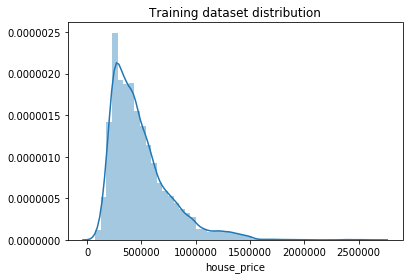

In [68]:
plt.title('Training dataset distribution')
sns.distplot(house_y_train)

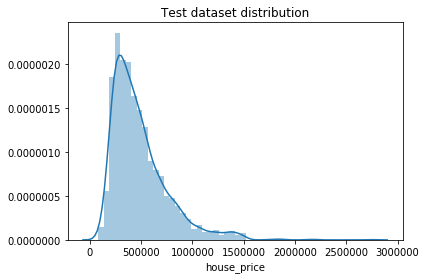

In [69]:
plt.title('Test dataset distribution')
sns.distplot(house_y_test)

## MODELLING

In [70]:
def adjustedr2(r2,p,n):
    return 1 - (1-r2)*(n-1)/(n-p-1)

### Apply step-wise forward regression for Linear Regression, KNN and Decision Tree

#### Linear Regression  

##### Begin with 4 most correlated attributes according to pearson correlation

In [71]:
attributes = ['grade','living_sqft','living15_sqft','above_sqft']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(4)'], columns = ["Model"])
df2 = pd.DataFrame(['grade + living_sqft + living15_sqft + above_sqft'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_1  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_1  = df_1.reset_index(drop=True)

df_1


,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.541


##### Continue to add more attributes if both R2 and adjustedR2 of test set increase and RMSE decrease 

In [72]:
#Adding no_baths attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(5)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_2  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_101 = pd.concat([df_1,df_2], axis=0)
df_101 = df_101.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_101  = df_101.reset_index(drop=True)

df_101

#Adding no_baths attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.544
1,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.541


In [73]:
#Adding lat attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(6)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_3  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_102 = pd.concat([df_101,df_3], axis=0)
df_102 = df_102.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_102  = df_102.reset_index(drop=True)

df_102

#Adding lat attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
1,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
2,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [74]:
#Adding no_bedrooms attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(7)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_4  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_103 = pd.concat([df_102,df_4], axis=0)
df_103 = df_103.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_103  = df_103.reset_index(drop=True)

df_103

#Adding no_bedrooms attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
1,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
2,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
3,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [75]:
#Adding view attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms','view']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(8)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_5  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_104 = pd.concat([df_103,df_5], axis=0)
df_104 = df_104.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_104  = df_104.reset_index(drop=True)

df_104

#Adding view attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
1,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
2,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
3,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
4,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [76]:
#Adding floors attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms','view','floors']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(9)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view, floors'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_6  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_105 = pd.concat([df_104,df_6], axis=0)
df_105 = df_105.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_105  = df_105.reset_index(drop=True)

df_105

#Adding floors attribute developed the model a bit so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(9),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6626
1,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
2,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
3,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
4,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
5,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [77]:
#Adding sqft_basement attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms','view','floors','sqft_basement']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(10)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view, floors, sqft_basement'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_7  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_106 = pd.concat([df_105,df_7], axis=0)
df_106 = df_106.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_106  = df_106.reset_index(drop=True)

df_106

#Adding sqft_basement attribute does not developed the model so do not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(9),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6626
1,Linear regression(10),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6625
2,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
3,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
4,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
5,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
6,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [78]:
#Adding yr_renovated attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms','view','floors','yr_renovated']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(10)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view, floors, yr_renovated'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_8  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_106 = pd.concat([df_105,df_8], axis=0)
df_106 = df_106.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_106  = df_106.reset_index(drop=True)

df_106

#Adding yr_renovated attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(10),"grade, living_sqft, living15_sqft, above_sqft,...",154274.0403,0.6865,0.6862,0.6794,0.6783
1,Linear regression(9),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6626
2,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
3,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
4,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
5,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
6,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [79]:
#Adding waterfront attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','lat','no_bedrooms','view','floors','yr_renovated','waterfront']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(11)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view, floors, yr_renovated, waterfront'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_9  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_107 = pd.concat([df_106,df_9], axis=0)
df_107 = df_107.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_107  = df_107.reset_index(drop=True)

df_107

#Adding waterfront attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(11),"grade, living_sqft, living15_sqft, above_sqft,...",153823.0939,0.6884,0.6881,0.6812,0.6801
1,Linear regression(10),"grade, living_sqft, living15_sqft, above_sqft,...",154274.0403,0.6865,0.6862,0.6794,0.6783
2,Linear regression(9),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6626
3,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
4,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
5,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
6,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
7,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [80]:
#Adding yr_built attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms','view','floors','yr_renovated','waterfront','yr_built']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(12)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view, floors, yr_renovated, waterfront, yr_built'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_10  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_108 = pd.concat([df_107,df_10], axis=0)
df_108 = df_108.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_108  = df_108.reset_index(drop=True)

df_108

#Adding yr_built attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(12),"grade, living_sqft, living15_sqft, above_sqft,...",145516.6817,0.7229,0.7226,0.7147,0.7135
1,Linear regression(11),"grade, living_sqft, living15_sqft, above_sqft,...",153823.0939,0.6884,0.6881,0.6812,0.6801
2,Linear regression(10),"grade, living_sqft, living15_sqft, above_sqft,...",154274.0403,0.6865,0.6862,0.6794,0.6783
3,Linear regression(9),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6626
4,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
5,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
6,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
7,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
8,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [81]:
#Adding lot_sqft attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms','view','floors','yr_renovated','waterfront','yr_built','lot_sqft']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(13)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view, floors, yr_renovated, waterfront, yr_built, lot_sqft'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_11  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_109 = pd.concat([df_108,df_11], axis=0)
df_109 = df_109.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_109  = df_109.reset_index(drop=True)

df_109

#Adding lot_sqft attribute does not developed the model so do not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(12),"grade, living_sqft, living15_sqft, above_sqft,...",145516.6817,0.7229,0.7226,0.7147,0.7135
1,Linear regression(13),"grade, living_sqft, living15_sqft, above_sqft,...",145606.8078,0.7230,0.7227,0.7144,0.7131
2,Linear regression(11),"grade, living_sqft, living15_sqft, above_sqft,...",153823.0939,0.6884,0.6881,0.6812,0.6801
3,Linear regression(10),"grade, living_sqft, living15_sqft, above_sqft,...",154274.0403,0.6865,0.6862,0.6794,0.6783
4,Linear regression(9),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6626
5,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
6,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
7,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
8,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
9,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [82]:
#Adding lot15_sqft attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms','view','floors','yr_renovated','waterfront','yr_built','lot15_sqft']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(13)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view, floors, yr_renovated, waterfront, yr_built, lot15_sqft'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_12  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_109 = pd.concat([df_108,df_12], axis=0)
df_109 = df_109.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_109  = df_109.reset_index(drop=True)

df_109

#Adding lot15_sqft attribute does not developed the model so do not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(12),"grade, living_sqft, living15_sqft, above_sqft,...",145516.6817,0.7229,0.7226,0.7147,0.7135
1,Linear regression(13),"grade, living_sqft, living15_sqft, above_sqft,...",145505.1523,0.7230,0.7227,0.7148,0.7135
2,Linear regression(11),"grade, living_sqft, living15_sqft, above_sqft,...",153823.0939,0.6884,0.6881,0.6812,0.6801
3,Linear regression(10),"grade, living_sqft, living15_sqft, above_sqft,...",154274.0403,0.6865,0.6862,0.6794,0.6783
4,Linear regression(9),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6626
5,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
6,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
7,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
8,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
9,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


In [83]:
#Adding long attribute

attributes = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms','view','floors','yr_renovated','waterfront','yr_built','long']

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train[attributes],house_y_train)
pred_lr = model_lr.predict(house_x_test[attributes])

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train[attributes],house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,len(attributes),house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test[attributes],house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,len(attributes),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(13)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms, view, floors, yr_renovated, waterfront, yr_built, long'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_13  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_109 = pd.concat([df_108,df_13], axis=0)
df_109 = df_109.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_109  = df_109.reset_index(drop=True)

df_109

#Adding long attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(13),"grade, living_sqft, living15_sqft, above_sqft,...",145367.2929,0.7231,0.7228,0.7153,0.7140
1,Linear regression(12),"grade, living_sqft, living15_sqft, above_sqft,...",145516.6817,0.7229,0.7226,0.7147,0.7135
2,Linear regression(11),"grade, living_sqft, living15_sqft, above_sqft,...",153823.0939,0.6884,0.6881,0.6812,0.6801
3,Linear regression(10),"grade, living_sqft, living15_sqft, above_sqft,...",154274.0403,0.6865,0.6862,0.6794,0.6783
4,Linear regression(9),"grade, living_sqft, living15_sqft, above_sqft,...",158005.4723,0.6735,0.6732,0.6637,0.6626
5,Linear regression(8),"grade, living_sqft, living15_sqft, above_sqft,...",158073.9366,0.6733,0.6731,0.6634,0.6624
6,Linear regression(7),"grade, living_sqft, living15_sqft, above_sqft,...",163405.3233,0.6511,0.6509,0.6403,0.6394
7,Linear regression(6),"grade, living_sqft, living15_sqft, above_sqft,...",163660.1669,0.6492,0.6490,0.6392,0.6384
8,Linear regression(5),"grade, living_sqft, living15_sqft, above_sqft,...",183809.0618,0.5647,0.5645,0.5448,0.5440
9,Linear regression(4),grade + living_sqft + living15_sqft + above_sqft,184441.0809,0.5635,0.5633,0.5417,0.5410


#### KNN

##### Begin with 4 most correlated attributes according to pearson correlation

In [84]:
attributes2 = ['grade','living_sqft','living15_sqft','above_sqft']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(4)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_01  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_01  = df_01.reset_index(drop=True)

df_01

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331


In [85]:
#Adding no_baths attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(5)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_02  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_201 = pd.concat([df_01,df_02], axis=0)
df_201 = df_201.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_201  = df_201.reset_index(drop=True)

df_201

#Adding no_baths attribute develop the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
1,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [86]:
#Adding lat attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(6)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_03  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_202 = pd.concat([df_201,df_03], axis=0)
df_202 = df_202.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_202 = df_202.reset_index(drop=True)

df_202

#Adding lat attribute develop the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
1,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
2,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [87]:
#Adding no_bedrooms attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','no_bedrooms']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(7)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, no_bedrooms'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_04  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_203 = pd.concat([df_202,df_04], axis=0)
df_203 = df_203.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_203 = df_203.reset_index(drop=True)

df_203

#Adding no_bedrooms attribute does not develop the model so do not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
1,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
2,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",205102.4740,0.6424,0.6422,0.4333,0.4319
3,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [88]:
#Adding view attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(7)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_05  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_204 = pd.concat([df_202,df_05], axis=0)
df_204 = df_204.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_204 = df_204.reset_index(drop=True)

df_204

#Adding view attribute develop the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
1,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
2,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
3,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [89]:
#Adding floors attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','floors']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(8)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, floors'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_06 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_205 = pd.concat([df_204,df_06], axis=0)
df_205 = df_205.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_205 = df_205.reset_index(drop=True)

df_205

#Adding floors attribute does not develop the model so do not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
1,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
2,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
3,KNN(8),"grade, living_sqft, living15_sqft, above_sqft,...",204937.1859,0.6434,0.6431,0.4342,0.4326
4,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [90]:
#Adding sqft_basement attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','sqft_basement']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(8)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, sqft_basement'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_07 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_206 = pd.concat([df_204,df_07], axis=0)
df_206 = df_206.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_206 = df_206.reset_index(drop=True)

df_206

#Adding sqft_basement attribute does not develop the model so do not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(8),"grade, living_sqft, living15_sqft, above_sqft,...",202812.4398,0.6454,0.6451,0.4459,0.4443
1,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
2,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
3,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
4,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [91]:
#Adding yr_renovated attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','yr_renovated']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(8)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, yr_renovated'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_08 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_207 = pd.concat([df_204,df_08], axis=0)
df_207 = df_207.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_207 = df_207.reset_index(drop=True)

df_207

#Adding yr_renovated attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(8),"grade, living_sqft, living15_sqft, above_sqft,...",193342.6662,0.6638,0.6636,0.4964,0.4950
1,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
2,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
3,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
4,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [92]:
#Adding waterfront attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','yr_renovated','waterfront']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(9)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, yr_renovated, waterfront'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_09 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_208 = pd.concat([df_207,df_09], axis=0)
df_208 = df_208.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_208 = df_208.reset_index(drop=True)

df_208

#Adding waterfront attribute does not develope the model so do not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(8),"grade, living_sqft, living15_sqft, above_sqft,...",193342.6662,0.6638,0.6636,0.4964,0.4950
1,KNN(9),"grade, living_sqft, living15_sqft, above_sqft,...",193342.6662,0.6638,0.6635,0.4964,0.4948
2,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
3,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
4,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
5,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [93]:
#Adding yr_built attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','yr_renovated','yr_built']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(9)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, yr_renovated, yr_built'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_010 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_209 = pd.concat([df_207,df_010], axis=0)
df_209 = df_209.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_209 = df_209.reset_index(drop=True)

df_209

#Adding yr_bıilt attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(9),"grade, living_sqft, living15_sqft, above_sqft,...",189974.0855,0.6837,0.6834,0.5138,0.5122
1,KNN(8),"grade, living_sqft, living15_sqft, above_sqft,...",193342.6662,0.6638,0.6636,0.4964,0.4950
2,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
3,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
4,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
5,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [94]:
#Adding lot_sqft attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','yr_renovated','yr_built','lot_sqft']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(10)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, yr_renovated, yr_built, lot_sqft'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_011 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_210 = pd.concat([df_209,df_011], axis=0)
df_210 = df_210.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_210 = df_210.reset_index(drop=True)

df_210

#Adding lot_sqft attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(10),"grade, living_sqft, living15_sqft, above_sqft,...",185048.1109,0.6997,0.6994,0.5387,0.5370
1,KNN(9),"grade, living_sqft, living15_sqft, above_sqft,...",189974.0855,0.6837,0.6834,0.5138,0.5122
2,KNN(8),"grade, living_sqft, living15_sqft, above_sqft,...",193342.6662,0.6638,0.6636,0.4964,0.4950
3,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
4,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
5,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
6,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [95]:
#Adding lot15_sqft attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','yr_renovated','yr_built','lot_sqft','lot15_sqft']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(11)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, yr_renovated, yr_built, lot_sqft, lot15_sqft'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_012 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_211 = pd.concat([df_210,df_012], axis=0)
df_211 = df_211.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_211 = df_211.reset_index(drop=True)

df_211

#Adding lot15_sqft attribute does not developed the model so do not include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(10),"grade, living_sqft, living15_sqft, above_sqft,...",185048.1109,0.6997,0.6994,0.5387,0.5370
1,KNN(11),"grade, living_sqft, living15_sqft, above_sqft,...",188954.9485,0.6849,0.6846,0.5190,0.5171
2,KNN(9),"grade, living_sqft, living15_sqft, above_sqft,...",189974.0855,0.6837,0.6834,0.5138,0.5122
3,KNN(8),"grade, living_sqft, living15_sqft, above_sqft,...",193342.6662,0.6638,0.6636,0.4964,0.4950
4,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
5,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
6,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
7,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


In [96]:
#Adding long attribute

attributes2 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','yr_renovated','yr_built','long','lot15_sqft']

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train[attributes2],house_y_train)
pred_knn = model_knn.predict(house_x_test[attributes2])

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train[attributes2],house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,len(attributes2),house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test[attributes2],house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,len(attributes2),house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(11)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, yr_renovated, yr_built, lot_sqft, long'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_013 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_212 = pd.concat([df_210,df_013], axis=0)
df_212 = df_212.sort_values(['Adjusted R Squared (test)'], ascending=False)
df_212 = df_212.reset_index(drop=True)

df_212

#Adding long attribute developed the model so include it

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(11),"grade, living_sqft, living15_sqft, above_sqft,...",182174.3073,0.7114,0.7111,0.5529,0.5511
1,KNN(10),"grade, living_sqft, living15_sqft, above_sqft,...",185048.1109,0.6997,0.6994,0.5387,0.5370
2,KNN(9),"grade, living_sqft, living15_sqft, above_sqft,...",189974.0855,0.6837,0.6834,0.5138,0.5122
3,KNN(8),"grade, living_sqft, living15_sqft, above_sqft,...",193342.6662,0.6638,0.6636,0.4964,0.4950
4,KNN(6),"grade, living_sqft, living15_sqft, above_sqft,...",204803.7009,0.6436,0.6434,0.4349,0.4337
5,KNN(7),"grade, living_sqft, living15_sqft, above_sqft,...",204826.5868,0.6439,0.6437,0.4348,0.4334
6,KNN(4),"grade, living_sqft, living15_sqft, above_sqft",204990.7609,0.6416,0.6415,0.4339,0.4331
7,KNN(5),"grade, living_sqft, living15_sqft, above_sqft,...",205187.2313,0.6421,0.6419,0.4328,0.4318


#### Decision Tree

In [97]:
attributes3 = ['grade','living_sqft','living15_sqft','above_sqft','lat','no_bedrooms','view','floors','yr_renovated','waterfront','yr_built','long']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(house_x_train[attributes3],house_y_train)
pred_dec_tree = model_dec_tree.predict(house_x_test[attributes3])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(house_x_train[attributes3],house_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes3),house_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(house_x_test[attributes3],house_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes3),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(12)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, lat, no_bedrooms, view, floors, yr_renovated, waterfront, yr_built, long'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_001  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)

df_001

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(12),"grade, living_sqft, living15_sqft, above_sqft,...",140742.2562,0.9987,0.9987,0.7331,0.732


In [98]:
attributes3 = ['grade','living_sqft','living15_sqft','above_sqft','no_baths','lat','view','yr_renovated','yr_built','long','lot15_sqft']

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(house_x_train[attributes3],house_y_train)
pred_dec_tree = model_dec_tree.predict(house_x_test[attributes3])

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(house_x_train[attributes3],house_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,len(attributes3),house_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(house_x_test[attributes3],house_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,len(attributes3),house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(12)'], columns = ["Model"])
df2 = pd.DataFrame(['grade, living_sqft, living15_sqft, above_sqft, no_baths, lat, view, yr_renovated, yr_built, lot_sqft, long'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_002  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)

df_002

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(12),"grade, living_sqft, living15_sqft, above_sqft,...",139053.655,0.9987,0.9987,0.7395,0.7385


##### Without step-wise regression

In [99]:
#Linear regression application for all attributes

lr = linear_model.LinearRegression()
model_lr = lr.fit(house_x_train,house_y_train)
pred_lr = model_lr.predict(house_x_test)

rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_lr)),'.4f'))
r2_lr_train = float(format(model_lr.score(house_x_train,house_y_train),'.4f'))
adjr2_lr_train = float(format(adjustedr2(r2_lr_train,house_x_train.shape[1],house_x_train.shape[0]),'.4f'))

r2_lr_test = float(format(model_lr.score(house_x_test,house_y_test),'.4f'))
adjr2_lr_test = float(format(adjustedr2(r2_lr_test,house_x_train.shape[1],house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Linear regression(All)'], columns = ["Model"])
df2 = pd.DataFrame(['ALL'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_lr], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_lr_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_lr_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_lr_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_lr_test], columns = ["Adjusted R Squared (test)"])



df_1001  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_1001  = df_1001.reset_index(drop=True)

df_1001

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Linear regression(All),ALL,145489.6836,0.7234,0.723,0.7148,0.7132


In [100]:
#KNN application for all attributes

knn = KNeighborsRegressor()
model_knn = knn.fit(house_x_train,house_y_train)
pred_knn = model_knn.predict(house_x_test)

rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_knn)),'.4f'))
r2_knn_train = float(format(model_knn.score(house_x_train,house_y_train),'.4f'))
adjr2_knn_train = float(format(adjustedr2(r2_knn_train,house_x_train.shape[1],house_x_train.shape[0]),'.4f'))

r2_knn_test = float(format(model_knn.score(house_x_test,house_y_test),'.4f'))
adjr2_knn_test = float(format(adjustedr2(r2_knn_test,house_x_train.shape[1],house_x_test.shape[0]),'.4f'))

df1 = pd.DataFrame(['KNN(all)'], columns = ["Model"])
df2 = pd.DataFrame(['ALL'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_knn], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_knn_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_knn_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_knn_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_knn_test], columns = ["Adjusted R Squared (test)"])



df_1002  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
df_1002  = df_1002.reset_index(drop=True)

df_1002

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,KNN(all),ALL,189790.5117,0.6849,0.6844,0.5147,0.5119


In [101]:
#Decision Tree application for all attributes

dec_tree = tree.DecisionTreeRegressor()
model_dec_tree = dec_tree.fit(house_x_train,house_y_train)
pred_dec_tree = model_dec_tree.predict(house_x_test)

rmse_dec_tree = float(format(np.sqrt(metrics.mean_squared_error(house_y_test,pred_dec_tree)),'.4f'))
r2_dec_tree_train = float(format(model_dec_tree.score(house_x_train,house_y_train),'.4f'))
adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,house_x_train.shape[1],house_x_train.shape[0]),'.4f'))

r2_dec_tree_test = float(format(model_dec_tree.score(house_x_test,house_y_test),'.4f'))
adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,house_x_train.shape[1],house_x_test.shape[0]),'.4f'))


df1 = pd.DataFrame(['Decision tree(All)'], columns = ["Model"])
df2 = pd.DataFrame(['ALL'], columns=["Used attributes"])
df3 = pd.DataFrame([rmse_dec_tree], columns = ["Root Mean Squard Error (RMSE)"])
df4 = pd.DataFrame([r2_dec_tree_train], columns = ["R Squared (training)"])
df5 = pd.DataFrame([adjr2_dec_tree_train], columns = ["Adjusted R Squared (training)"])
df6 = pd.DataFrame([r2_dec_tree_test], columns = ["R Squared (test)"])
df7 = pd.DataFrame([adjr2_dec_tree_test], columns = ["Adjusted R Squared (test)"])



df_1003  = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)

df_1003

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(All),ALL,143447.9282,0.9987,0.9987,0.7228,0.7212


### COMPARISON

In [102]:
df = pd.concat([df_13,df_013,df_001,df_1001,df_1002,df_1003], axis=0)
df = df.sort_values(['R Squared (test)'], ascending=False)
df = df.reset_index(drop=True)

df

,Model,Used attributes,Root Mean Squard Error (RMSE),R Squared (training),Adjusted R Squared (training),R Squared (test),Adjusted R Squared (test)
0,Decision tree(12),"grade, living_sqft, living15_sqft, above_sqft,...",140742.2562,0.9987,0.9987,0.7331,0.7320
1,Decision tree(All),ALL,143447.9282,0.9987,0.9987,0.7228,0.7212
2,Linear regression(13),"grade, living_sqft, living15_sqft, above_sqft,...",145367.2929,0.7231,0.7228,0.7153,0.7140
3,Linear regression(All),ALL,145489.6836,0.7234,0.7230,0.7148,0.7132
4,KNN(11),"grade, living_sqft, living15_sqft, above_sqft,...",182174.3073,0.7114,0.7111,0.5529,0.5511
5,KNN(all),ALL,189790.5117,0.6849,0.6844,0.5147,0.5119
